This notebook contains an exploratory data analysis (EDA) of data pertaining to passengers aboard the Titanic. In order to examine the factors affecting the survival rates, I have taken the below steps.

1. Import neccessary Python libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

2. Gain an overview of the dataset to inform next steps

In [45]:
# Load dataset
df = pd.read_csv('Titanic.csv')
# Print shape of dataset
print("\nShape of dataset:", df.shape)
# Print information about dataset, including missing values
print("\nInformation about dataset:")
print(df.info())


Shape of dataset: (891, 12)

Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


3. Clean data to prepare for analysis

In [46]:
# Fill missing values in 'Age' with median age
df['Age'] = df['Age'].fillna(df['Age'].median())
# Remove 'Cabin' and 'Name' column as 'Cabin' has too much missing data to be useful and 'Name' is irrelevant to analysis
df.drop('Cabin', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)

4. Transform data to make variables comparable

In [47]:
# Define age bins and labels before normalisation
age_bins = [0, 12, 20, 40, 60, 80]
age_labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
# Create age groups before normalisation
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
# Normalise 'Fare' and 'Age' using MinMaxScaler
scaler = MinMaxScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])

5. Preprocess dataset

In [48]:
# One hot encode categorical variables 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

6. Analyse data and create visulations to examine relationships between variables

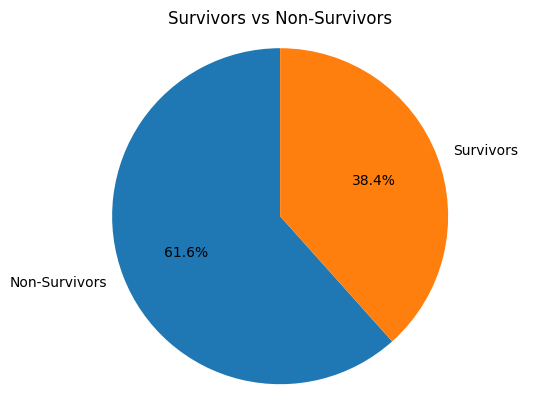


Survival rates by sex (percentage):
Female    74.203822
Male      18.890815
Name: Survived, dtype: float64

Survival rates by age (percentage):
AgeGroup
Child          57.971014
Teen           38.181818
Adult          36.476868
Middle-Aged    39.062500
Senior         22.727273
Name: Survived, dtype: float64

Survival rates by passenger class (percentage):
1st Class    62.962963
2nd Class    47.282609
3rd Class    24.236253
Name: Survived, dtype: float64


C:\Users\javah\AppData\Local\Temp\ipykernel_16172\1925555509.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100


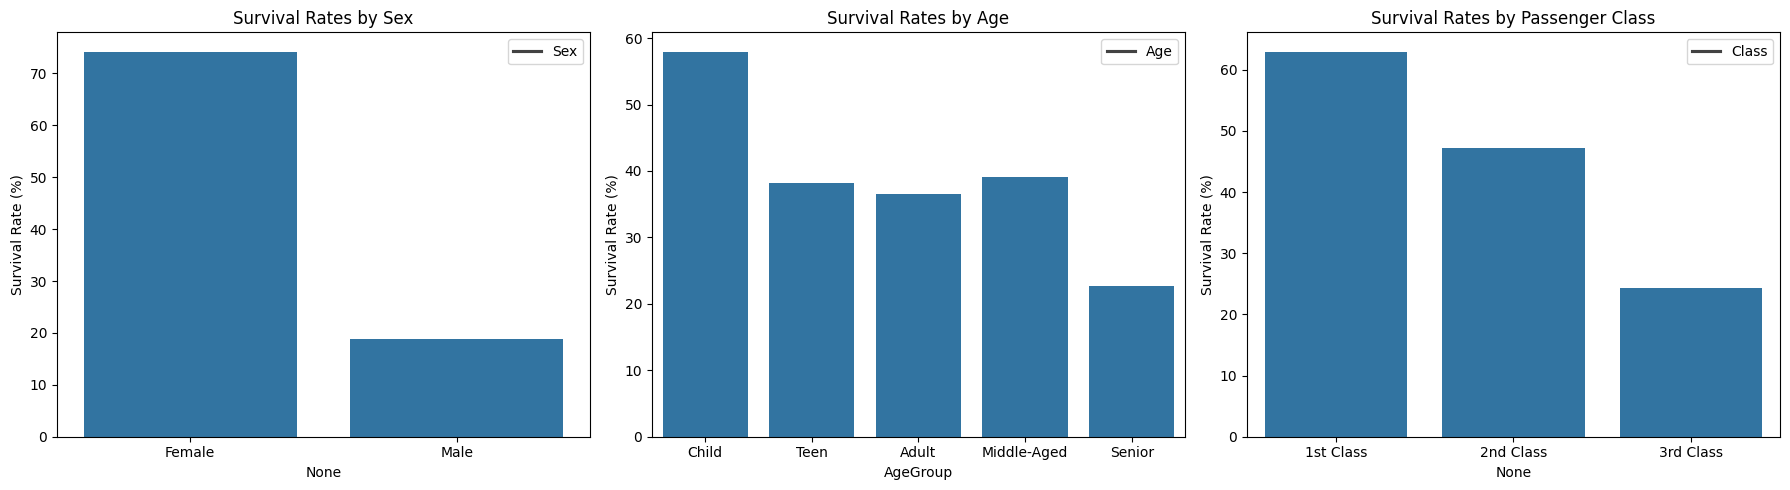

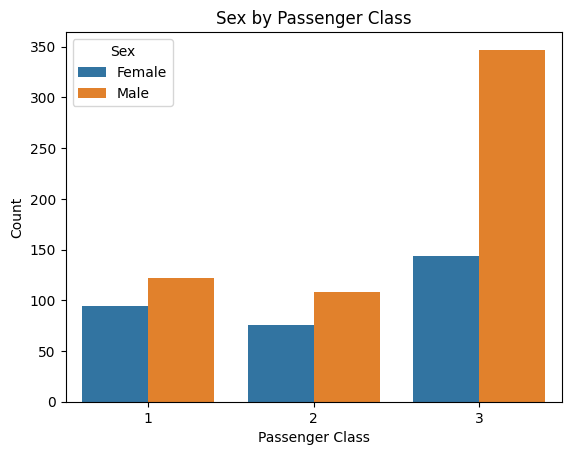

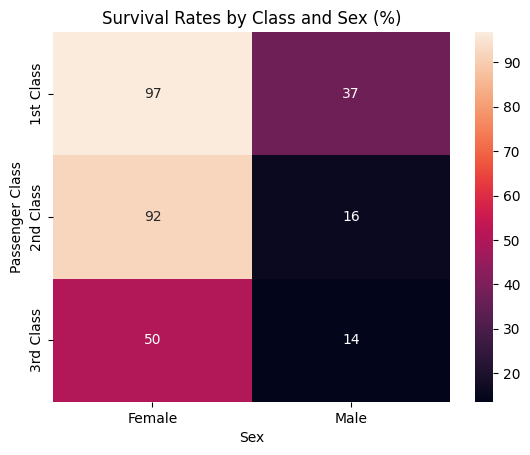

In [49]:
# Visualization of number of survivors vs non-survivors
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts, labels=['Non-Survivors', 'Survivors'], autopct='%1.1f%%', startangle=90)
plt.title('Survivors vs Non-Survivors')
plt.axis('equal')
plt.show()
# Calculate survival rates by sex
survival_by_sex = df.groupby('Sex_male')['Survived'].mean() * 100
survival_by_sex.index = ['Female', 'Male']
print("\nSurvival rates by sex (percentage):")
print(survival_by_sex)
# Calculate survival rates by age
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100
print("\nSurvival rates by age (percentage):")
print(survival_by_age_group)
# Calculate survival rates by passenger class
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_pclass.index = ['1st Class', '2nd Class', '3rd Class']
print("\nSurvival rates by passenger class (percentage):")
print(survival_by_pclass)
# Visualize survival rates by sex, age and passenger class in 3 barplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Barplot to visual survival rates by sex
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, ax=axes[0])
axes[0].set_title('Survival Rates by Sex')
axes[0].set_ylabel('Survival Rate (%)')
axes[0].legend(['Sex'])
# Barplot to visualise survival rates by age 
sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, ax=axes[1])
axes[1].set_title('Survival Rates by Age')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].legend(['Age'])
# Barplot to visualise survival rates by passenger class
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, ax=axes[2])
axes[2].set_title('Survival Rates by Passenger Class')
axes[2].set_ylabel('Survival Rate (%)')
axes[2].legend(['Class'])
plt.tight_layout()
plt.show()
# Countplot to visualse passenger class by sex
sns.countplot(x='Pclass', hue='Sex_male', data=df)
plt.title('Sex by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Female', 'Male'], title='Sex')
plt.show()
# Heatmap to visualise survival rates by passenger class and sex
survival_by_class_and_sex = df.groupby(['Pclass', 'Sex_male'])['Survived'].mean().unstack() * 100
survival_by_class_and_sex.columns = ['Female', 'Male']
survival_by_class_and_sex.index = ['1st Class', '2nd Class', '3rd Class']
sns.heatmap(survival_by_class_and_sex, annot=True)
plt.title('Survival Rates by Class and Sex (%)')
plt.xlabel('Sex')
plt.ylabel('Passenger Class')
plt.show()

7. Observations and conclusions based on EDA

The data shows that the majority of passengers (62%) did not survive the sinking of the Titanic.

What was the most important factor in determining survival?

- The data shows that passengers in first class, children and women all had better survival rates than passengers in second and third class, adults and men. 
- Survival rate for 1st class passengers: 63% , survival rate for 2nd class passengers: 47% , survival rate for 3rd class passengers: 24%
- Survival rate for children: 58%, survival rate for adults: 36%, survival rate for middle-aged: 39%, survival rate for seniors: 23%
- Survival rate for women: 74%. survival rate for men: 19%
- Comparing the survival rate of men in 1st class (37%) with women in 3rd class (50%), shows that the affect of being a woman increases chances of survival more than being in 1st class. 
- This suggest sex is the most important factor in determing chances of survival.


Was preference given to upper class passengers on lifeboats?

- The higher survival rate of 1st class passengers (63%) compared to 2nd class passengers (47%) and 3rd class passengers (24%) suggests that the upper classes were given priority on the lifeboats, as they were more likely to be in 1st class.
- The higher survival rates of women in 1st (97%) and 2nd class ( 92%) compared to just 50% for women in 3rd class, further shows that priorty was given to the upper classes. 

Was the Birkenhead drill (women and children first) followed?

- The higher rate of survival for women (74%) compared to men (19%) and children (58%) compared to adults (36%) shows that this doctrine was mostly followed, but the data cannot account for why 42% of children did not survive. 
- The higher survival rate for women compared to men in every passenger class (97% in 1st class, 92% in 2nd class, 50% in 3rd class) shows that women were given priority for life boats.

Why was the survival rate for men so low?

- Being a woman and being in 1st class both made survival more likely. 
- Examining the relationship between sex and passenger class gives additional insight into why so few men survived. 
- The data shows that the overwhelming majority of passengers in 3rd class were men and that the majority of men on the ship were in 3rd class.
- Those in 3rd class and men were both less likely to surive. 
- As those in 3rd class were more likely to be men, both class and sex negatively affected mens chances or surivival. 